1. Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'. Поместите в переменную names_list список со строками имён.


In [21]:
names_list = 'Name1 Surname1, Name2 Surname2, …'

In [22]:
string

'Name1 Surname1, Name2 Surname2, …'

In [23]:
names_list.split(', ')

['Name1 Surname1', 'Name2 Surname2', '…']

2. В переменной df содержатся данные как на картинке task2.png (находится в папке с заданием). Отберите из них только те, где wealth 'medium', а возраст больше 35, и поместите в переменную medium_35

In [3]:
import pandas as pd

In [18]:
df = pd.DataFrame({
    'client_id': [1, 10, 12, 43, 100],
    'sex': [0, 1, 0, 0, 1],
    'wealth': ['medium', 'high', 'low', 'medium', 'high'],
    'age': [36, 43, 56, 23, 30]
})

In [19]:
df

,client_id,sex,wealth,age
0,1,0,medium,36
1,10,1,high,43
2,12,0,low,56
3,43,0,medium,23
4,100,1,high,30


In [24]:
medium_35 = df.query('(wealth == "medium") and (age > 35)')

In [25]:
medium_35

,client_id,sex,wealth,age
0,1,0,medium,36


3. Ваш коллега-новичок перепутал названия колонок в таблице из предыдущих заданий и прислал вам такой вариант task3.png (находится в папке с заданием). Приведите таблицу к каноничному виду, сохранив её в ту же переменную df, где сейчас находится нестандартно наименнованная таблица (воспользуйтесь методом rename).

In [26]:
df.columns = ['Клиент id', 'Пол', 'Благосостояние', 'Возраст']

In [27]:
df

,Клиент id,Пол,Благосостояние,Возраст
0,1,0,medium,36
1,10,1,high,43
2,12,0,low,56
3,43,0,medium,23
4,100,1,high,30


In [29]:
correspondance = {
    'Клиент id': 'client_id', 
    'Пол': 'sex', 
    'Благосостояние': 'wealth', 
    'Возраст': 'age'    
}
df.rename(columns=correspondance, inplace=True)

In [30]:
df

,client_id,sex,wealth,age
0,1,0,medium,36
1,10,1,high,43
2,12,0,low,56
3,43,0,medium,23
4,100,1,high,30


4. Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет храниться больше ли возраст 30 лет (булиновское значение)

In [31]:
df['older_than_30'] = df['age'] > 30

In [32]:
df

,client_id,sex,wealth,age,older_than_30
0,1,0,medium,36,True
1,10,1,high,43,True
2,12,0,low,56,True
3,43,0,medium,23,False
4,100,1,high,30,False


5. А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num

In [33]:
df.nunique()

client_id        5
sex              2
wealth           3
age              5
older_than_30    2
dtype: int64

6. У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида: task6.png. Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data.

In [36]:
data = pd.DataFrame({
    'client_id': [1, 5, 10],
    'amount': [100, 300, 9000],
    'date': [1533333349325, 145434545434, 45343243342]
})


In [37]:
data

,client_id,amount,date
0,1,100,1533333349325
1,5,300,145434545434
2,10,9000,45343243342


In [38]:
df.merge(data, how='inner', on='client_id')

,client_id,sex,wealth,age,older_than_30,amount,date
0,1,0,medium,36,True,100,1533333349325
1,10,1,high,43,True,9000,45343243342


7. Напишите функцию read_n_agg, которая 

- принимает на вход один параметр – путь к файлу

- считывает переданный файл, в котором разделителем является ;

- считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)

- возвращает результат этих действий (агрегированный датафрэйм)

Данные выглядят как в task7.png, датасэт в файле companies.csv

In [19]:
def read_n_agg(path):
    df = pd.read_csv('C:/Users/artyr/Desktop/Karpov_ML/companies.csv', sep=';')
    res = df.groupby('company') \
        .aggregate({'income': 'mean'})
    
    return res
    

In [20]:
read_n_agg('C:/Users/artyr/Desktop/Karpov_ML/companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


8. Вернемся к данным по поездкам на такси! На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей! Импортируйте pandas как pd. Загрузите датасет, используя ; в качестве разделителя. Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). Результат запишите в taxi.

In [58]:
import pandas as pd

In [59]:
taxi = pd.read_csv('C:/Users/artyr/Desktop/Karpov_ML/taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [60]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


- journey_id – уникальный id поездки
- user_id – id пользователя
- driver_id – id водителя
- taxi_id – id машины
- icon – тип поездки
- start_type – тип заказа (asap, reserved, delayed)
- start_at – время начала поездки
- start_lat – исходное местоположение пользователя, широта
- start_lon – исходное местоположение пользователя, долгота
- end_at – время окончания поездки
- end_lat – итоговое местоположение, широта
- end_lon – итоговое местоположение, долгота
- end_state – состояние заказа
- driver_start_lat – исходное местоположение водителя, широта
- driver_start_lon – исходное местоположение водителя, долгота
- arrived_at – время прибытия водителя
- source – платформа, с которой сделан заказ
- driver_score – оценка водителя клиентом
- rider_score – оценка клиента водителем

9. Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [61]:
(taxi.source.value_counts() / taxi.shape[0] * 100).idxmax()

'iPhone'

Альтернативный вариант:

In [64]:
round_taxi = taxi.source \
    .value_counts(normalize=True) \
    .mul(100) \
    .max()

In [67]:
round(round_taxi, 2)

42.37

10. Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
- Посчитайте частоту встречаемости каждой из оценок
- Переведите в проценты и округлите до 2 знаков после точки
- Сбросьте индексы
- Переименуйте колонки в driver_score и percentage
- Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
- Запишите результат в driver_score_counts

In [73]:
import numpy as np

In [102]:
driver_score_counts = taxi.driver_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'index':'driver_score', 'driver_score': 'percentage'}) \
    .sort_values('driver_score')

In [103]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


11. Постройте график

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

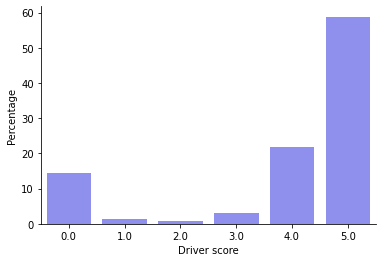

In [105]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

12. Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.

In [106]:
rider_score_counts = taxi.rider_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'index':'rider_score', 'rider_score': 'percentage'}) \
    .sort_values('rider_score')

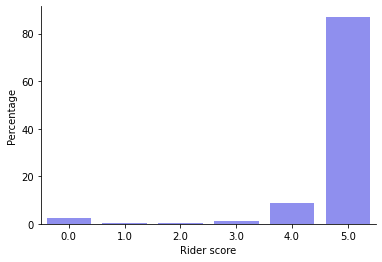

In [107]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()